In [1]:
from PIL import Image, ImageOps
import numpy as np
from einops import rearrange
from src.utils.mask_v2 import Maskerv2

/home/jupyter/H-engine/.venv/lib/python3.8/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.Op.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()
/home/jupyter/H-engine/.venv/lib/python3.8/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.OnnxFunction.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()


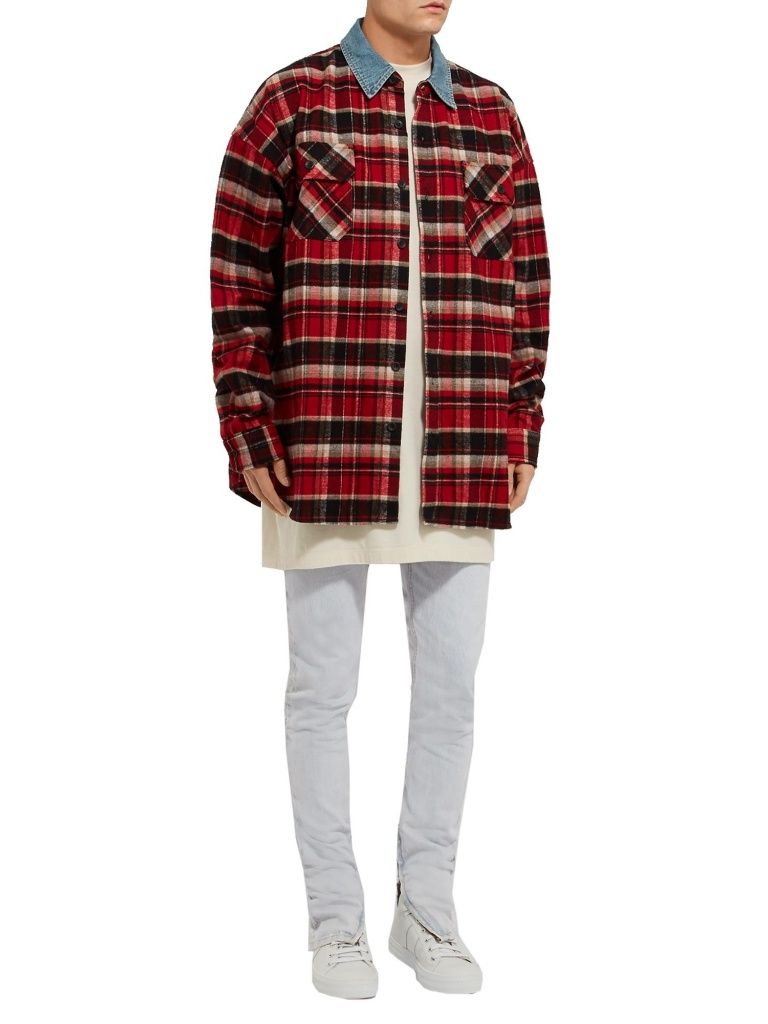

In [102]:
h, w = (1024, 768)
img = Image.open('../datasets/dresscode/lower_body/images/014625_0.jpg')
# img = Image.open('../assets/red_dress_girl.jpg')
img = ImageOps.fit(img, size=(w, h))
img

100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


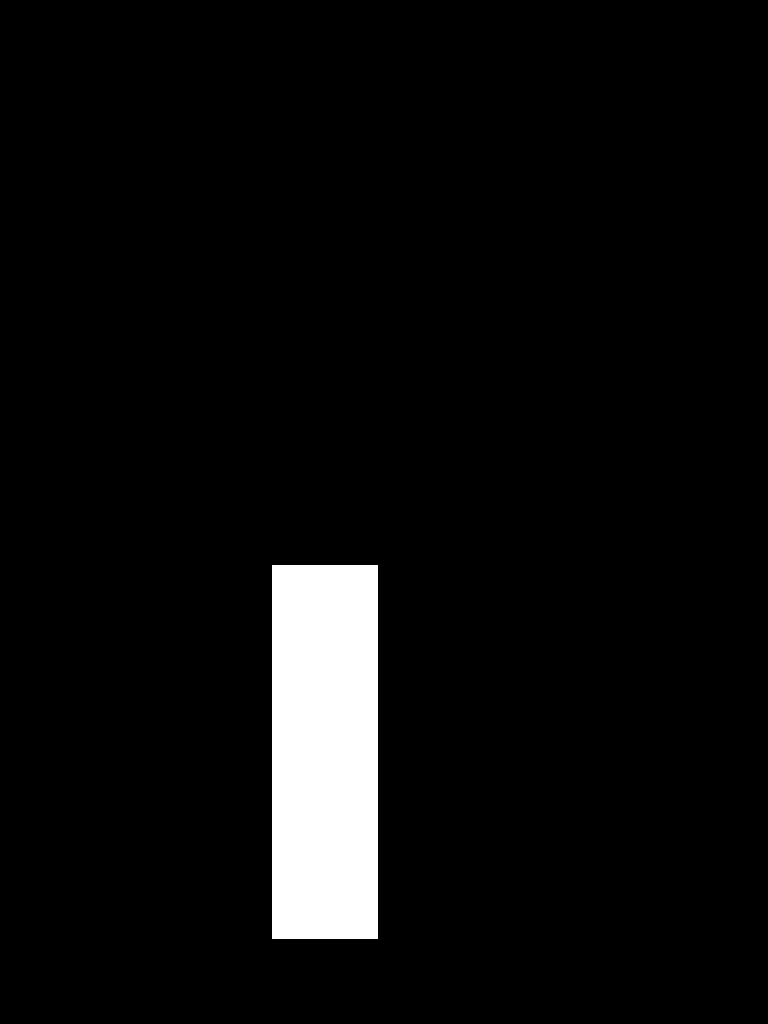

In [103]:
masker = Maskerv2()
mask, body_parse = masker.create_mask(img, category='lower_body', return_body_parse=True)
mask

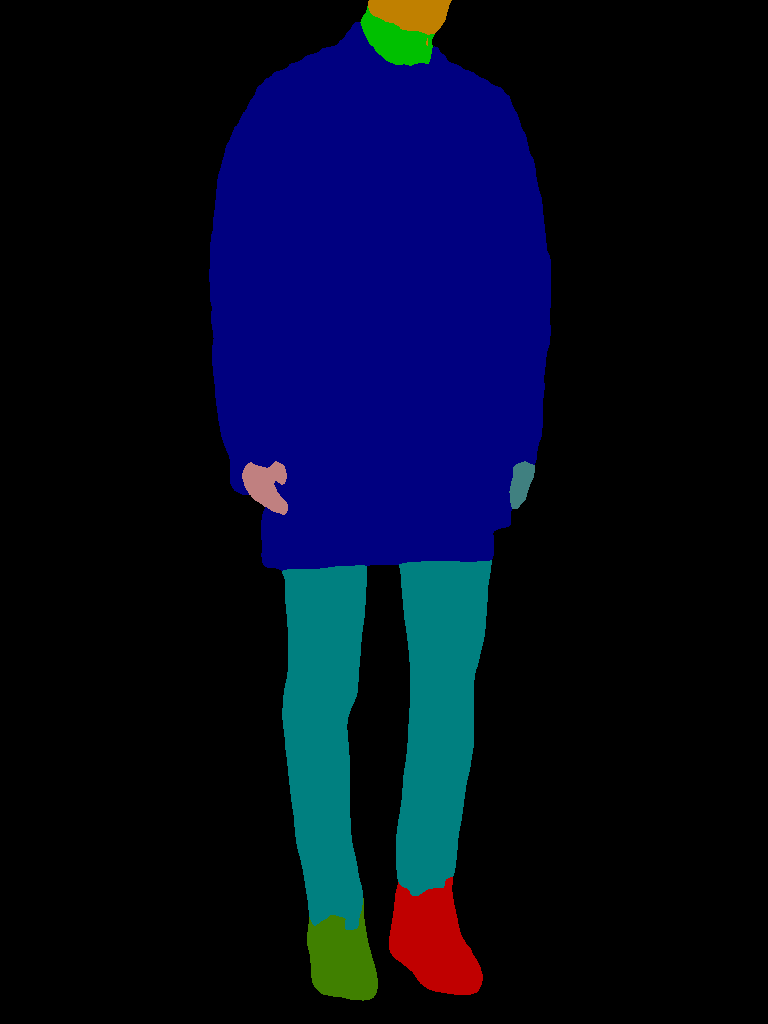

In [104]:
body_parse

In [105]:
7 in np.array(body_parse)

False

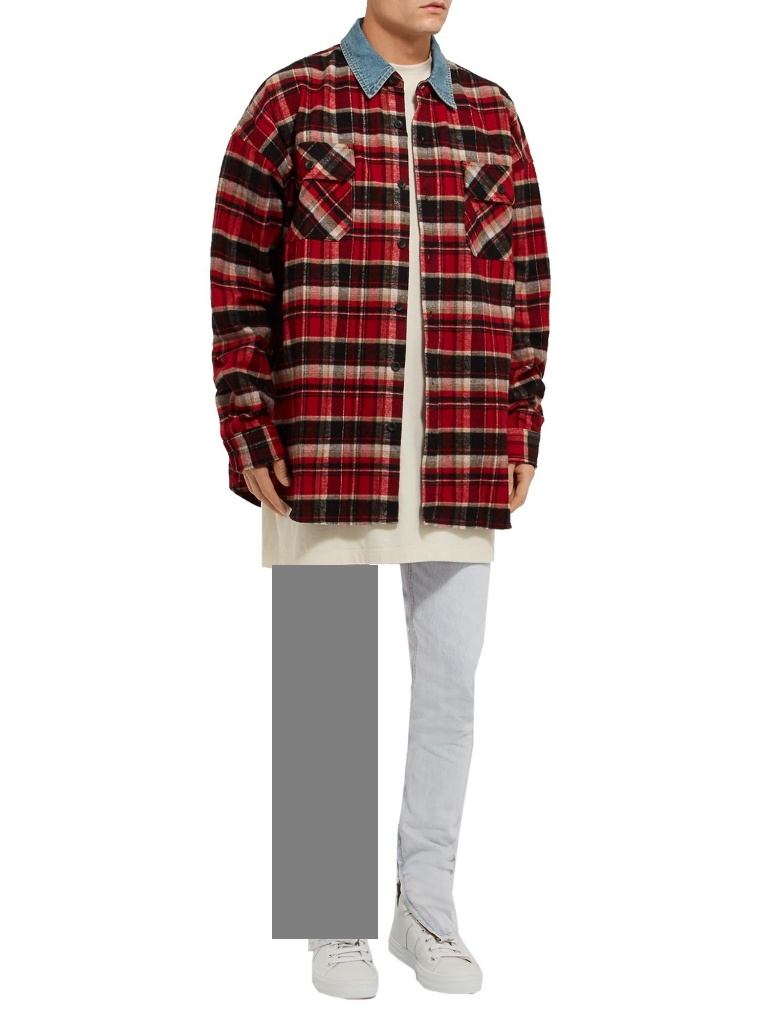

In [106]:
mask_np = np.array(mask)
mask_np = np.stack([mask_np] * 3)
mask_np = rearrange(mask_np, 'c h w -> h w c')
img_np = np.array(img)
out = np.where(mask_np, np.ones_like(mask_np) * 127, img_np)
Image.fromarray(out)

In [107]:
# mask = Image.open('../datasets/vitonhd/train/agnostic-mask-v2/00113_00.jpg')

# mask_np = np.array(mask)
# mask_np = np.stack([mask_np] * 3)
# mask_np = rearrange(mask_np, 'c h w -> h w c')
# img_np = np.array(img)
# masked_img_np = np.where(mask_np, np.ones_like(mask_np) * 127, img_np)
# Image.fromarray(masked_img_np)

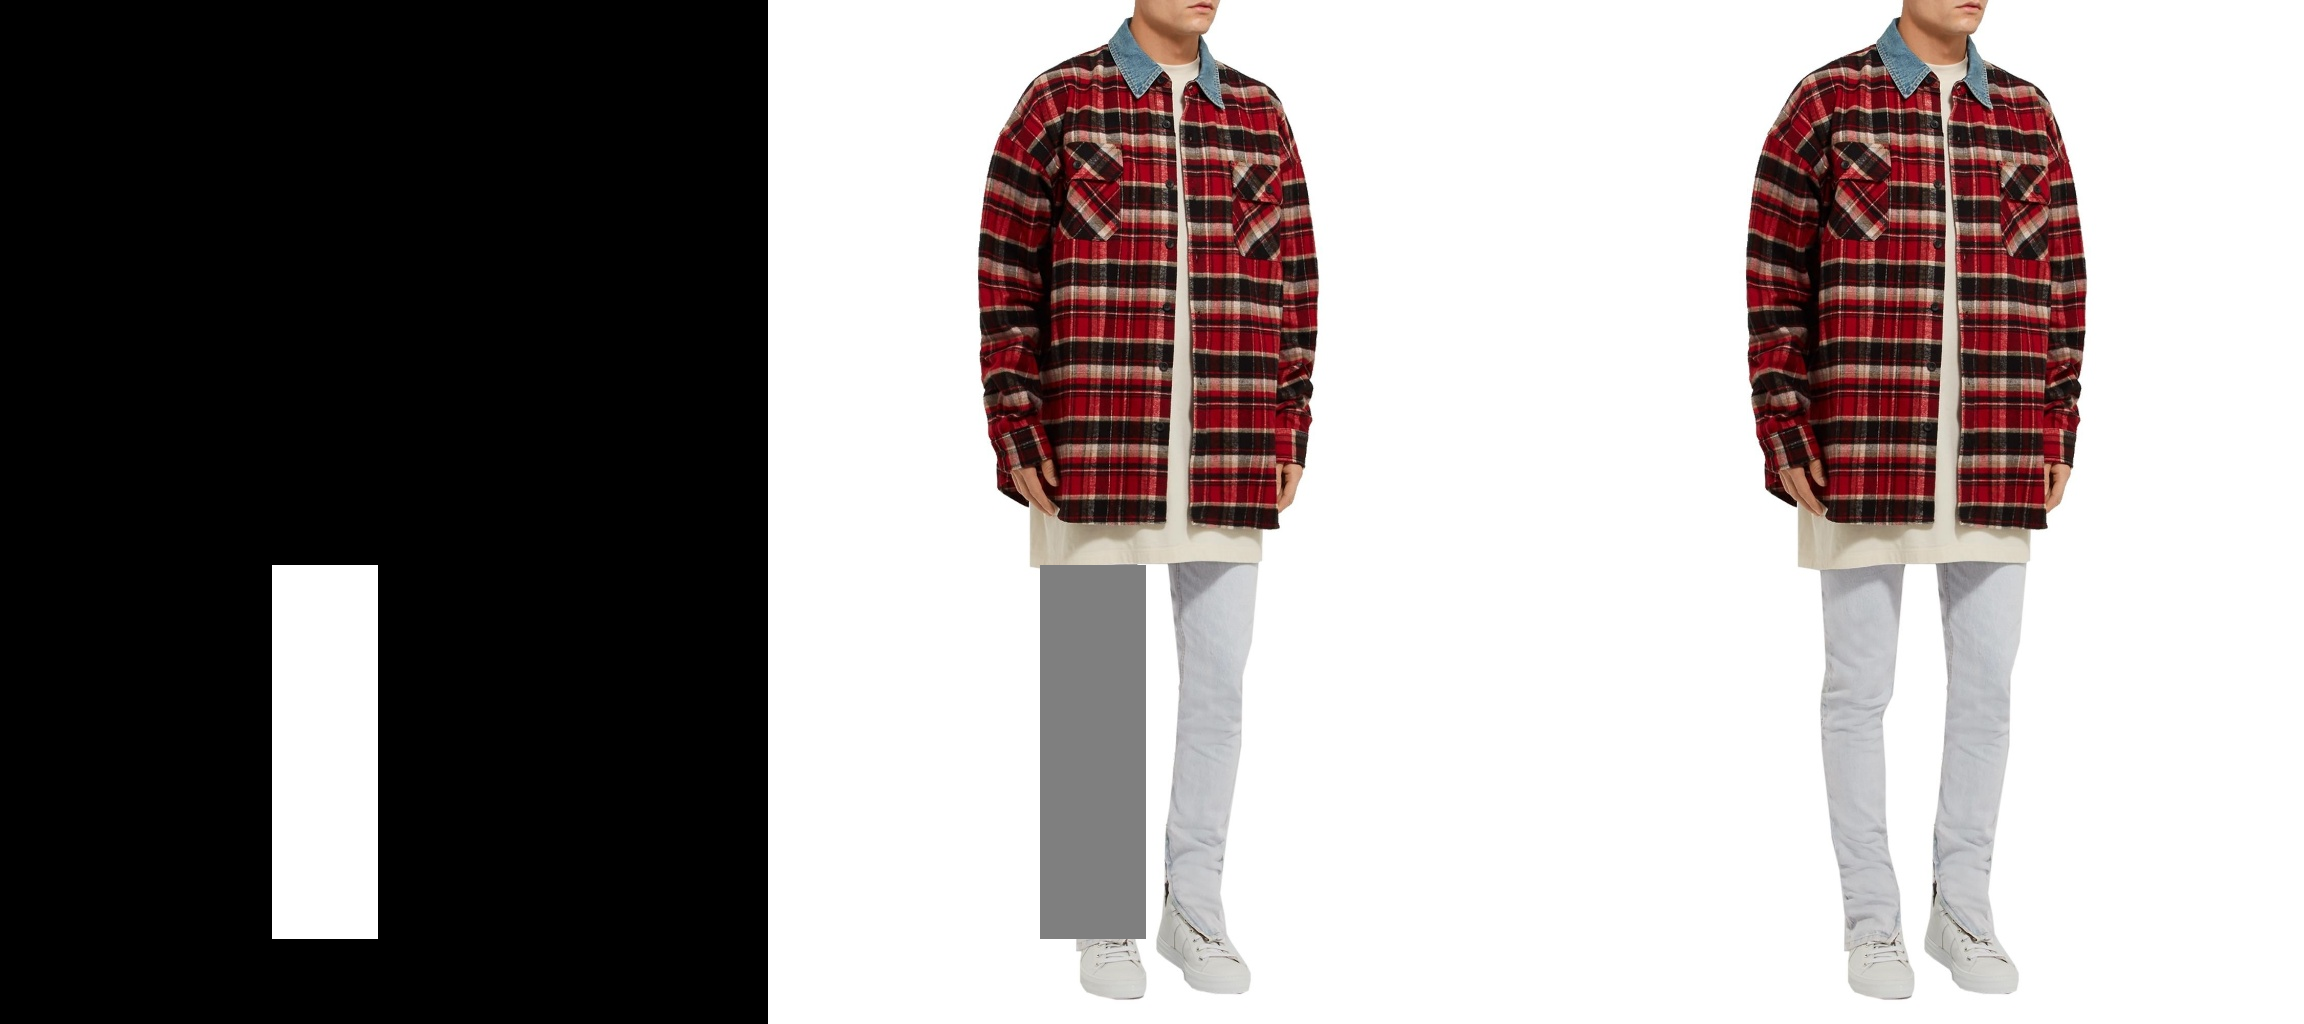

In [108]:
from diffusers.utils import make_image_grid

make_image_grid([mask, Image.fromarray(out), img], 1, 3)